## Imports

In [2]:
import gym # openAi gym
from gym import envs
import numpy as np 
from numpy import linalg as LA
import datetime
import keras 
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from time import sleep


from rl.agents.dqn import DQNAgent
from rl.policy import LinearAnnealedPolicy, BoltzmannQPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.core import Processor
from rl.callbacks import FileLogger, ModelIntervalCheckpoint

import os
from collections import deque

keras-rl implements some state-of-the art deep reinforcement learning algorithms in Python and seamlessly integrates with the deep learning library Keras.

Furthermore, keras-rl works with OpenAI Gym out of the box. This means that evaluating and playing around with different algorithms is easy.

In [ ]:
# !pip install keras
# !pip install tensorflow
# !pip install keras-rl
# !conda install -c conda-forge gym-box2d
# !sudo apt install cmake libz-dev # atari-py depends on cmake if its not installed atari-py installation will fail
# !pip install atari-py
# !pip install nes-py
# !pip install gym-super-mario-bros

## What is Reinforcement Learning?

<img src="rl_loop.png">

Reinforcement learning is the training of machine learning models to make a sequence of decisions. The agent learns to achieve a goal in an uncertain, potentially complex environment. In reinforcement learning, an artificial intelligence faces a game-like situation. The computer employs trial and error to come up with a solution to the problem. To get the machine to do what the programmer wants, the artificial intelligence gets either rewards or penalties for the actions it performs. Its goal is to maximize the total reward.

One of the most famous articles regarding Reinforcement Learning is the work of a team from the company DeepMind. They developed a Deep Reinforcement Learning system which can play more than 30 retro Atari games with human-like performance and even beat the human score. Most of the work done today involving the use of Python Gym and Reinforcement Learning makes reference to this article. It has been the precursor for the systems AlphaGo and AlphaZero. Article link:
https://arxiv.org/pdf/1312.5602.pdf

### Markov decision Process

A Markov system makes reference to thge property in which the state is independent of any previous states history except the last one. The current state encapsulates all the information required to make a decision in the next steps without the needd to store any information from the previous steps. In Reinforcement Learning the Environment is modeled as a markov model and the Agent needs to take actions in the environment to maximize the final reward. 

#### Bellman Equation

<img src="bellman_equation.svg">

- R(s,a) = Reward of action a in state s
- P(s'|s,a)= Probability of going to state s' given action a in state s. 
- γ = Discount factor gamma, how much discount is applicable for the future rewards. It must be between 0 and 1. The higher gamma the higher the focus on long term rewards

A value iteration algorithm makes use of the equation in the form of:

- Value V(s): The expected long-term return with discount, as opposed to the short-term reward R. Vπ(s) is defined as the expected long-term return of the current state (s) under policy π.

A Q learning algorithm makes use of the equation in the form of:

- Q-matrix or action-value Q(s,a): Q-matrix is similar to Value, except that it takes an extra parameter, the action a. Qπ(s, a) refers to the long-term return of the current state (s), taking action a under policy π.

#### Policy

- Policy (π): The strategy that the agent employs to determine next action 'a' in state 's'. It may or may not be the optimal decision policy generally denoted with the greek π. 

- Optimal policy (π*), policy which maximizes the expected reward. Among all the policies used, the optimal policy is the one that optimizes the approach to maximize the reward received or expected to receive over a lifetime.

#### Value Iteration Algorithm

A value iteration algorithm is centered around the game states. The idea is to calculate the value of each state as the expected long-term maximum result. The algorithm loops over all states (s) and possible actions (a) to explore rewards of a given action and calculates the maximum possible action/reward and stores it in V[s]. The algorithm iterates until V[s] is not improved anymore along a given value. 

The Optimal policy (π*) takes the action to go state with the highest reward value. This value iteration algorithm is an example of dynamic programming. This approach can also be solved using a recursive function such as the Bellman equation described earlier.

### Q-Learning

Centered around the agent and starts exploring based on trial-and-error to update its knowledge about the model and hence path to the best reward. The core of the idea is the Q-matrix

- Q(s, a). It contains the maximum discounted future reward when we perform action a in state s. Or in other words Q(s, a) gives estimates the best course of action a in state s. Q-learning learns by trail and error and updates its policy (Q-matrix) based on reward. 

After every step we update Q(s,a) using the reward, and the max Q value for new state resulting from the action. 

This update is done using the action value formula, based upon the Bellman equation and allows state-action pairs to be updated in a recursive fashion.

The Bellman equation is extended with a learning rate alpha:

<img src="q_learning_bellman.png">

If alpha is set to 1, we return to the original Bellman equation.

The Q-matrix is initialized with zero's. So initially it starts moving randomly until it hits a state/action with rewards or state/actions with a penalty. So random moves get no rewards but by brute force the state/action is found where a reward is given. In the next episode  the immediate actions preceding this state/action will direct toward it by use of the Q-Matrix. The problem is solved backwards from end-result towards steps to be taken to get to the maximum reward in a iterative fashion.

#### Exploration vs Exploitation

- Exploitation: Make the best decision given current information available (Go to the courses you know you like)
- Exploration: Gather more information (Take a new course to find out if you like the subject)

Some approaches for this tradeoff:

- Epsilon Greedy: We exploit the current situation with probability 1 — epsilon and explore a new option with probability epsilon, the rates of exploration and exploitation are fixed
- Epsilon-Decreasing: We exploit the current situation with probability 1 — epsilon and explore a new option with probability epsilon, with epsilon decreasing over time.
- Thompson sampling: the rates of exploration and exploitation are dynamically updated with respect to the entire probability distribution of each arm
- Epsilon-Decreasing with Softmax: We exploit the current situation with probability 1 — epsilon and explore a new option with probability epsilon, with epsilon decreasing over time. In the case of exploring a new option, we don’t just pick an option at random, but instead we estimate the outcome of each option, and then pick based on that, this is the softmax part.

### Deep Reinforcement Learning

Imagine you got a full Atari game screen of pixels as an observation and it becomes quickly visible the Q-matrix solution will not cope. A Q-learning agent does not have the ability to estimate value for unseen states, it has no clue which action to take and goes back to random action as best.

To deal with these problems, Deep Q-Network (DQN) removes the two-dimensional Q-matrix by introducing a Neural Network. So it leverages a Neural Network to estimate the Q-value function. The input for the network is the current game state, while the output is the corresponding Q-value for each of the actions.

In 2014 Google DeepMind published a paper titled "Playing Atari with Deep Reinforcement Learning" that can play Atari 2600 games at expert human levels. This was the first breakthruogh in applying deep neural networks for reinforcement learning.

<img src="atari_dqn.png">

## OpenAI Gym

Gym is a toolkit for developing and comparing reinforcement learning algorithms. It supports teaching agents everything from walking to playing games like Pong or Pinball.

<img src="rl_gym_loop.png">

Each timestep, the agent chooses an action, and the environment returns an observation and a reward.

observation, reward, done, info = env.step(action)

- observation (object): an environment-specific object representing your observation of the environment. For example, pixel data from a camera, joint angles and joint velocities of a robot, or the board state in a board game line Taxi.
- reward (float): amount of reward achieved by the previous action. The scale varies between environments, but the goal is always to increase your total reward.
- done (boolean): whether it’s time to reset the environment again. Most (but not all) tasks are divided up into well-defined episodes, and done being True indicates the episode has terminated. (For example, perhaps the pole tipped too far, or you lost your last life.)
- info (dict): ignore, diagnostic information useful for debugging. Official evaluations of your agent are not allowed to use this for learning.

There are a lot of different video game environments for testing Reinforcement Learning algorithms in different scenarios. Currently the number of different environments available in Python Gym is 859

Some of the environments available are:

Taxi, Mountaincar, InvertedPendulum, MarioBros, Atari games

In [2]:
print(len(envs.registry.all()))

859


#### Actions

Action (a): the input the agent provides to the environment. So what are the action commands the agents can give to the enironment? The value of env.action_space gives us this information.

What is the meaning of the actions? For the deep learning algorithm it should not matter, it should sort it out independent of the meaning of the action. But for humans it is handy to have the description, so we can understand the actions.

#### States

State (s): This represents the board state of the game and in gym returned it is returned as observation. State: a numeric representation of what the agent is observing at a particular moment of time in the environment.
In case of Taxi the observation is an integer, 500 different states are possible that translate to a nice graphic visual format with the render function. Note that this is specific for the Taxi game, in case of e.g. an Atari game the observation is the game screen with many coloured pixels.

### Taxi v3

This task was introduced in [Dietterich2000] to illustrate some issues in hierarchical reinforcement learning. There are 4 locations (labeled by different letters) and your job is to pick up the passenger at one location and drop him off in another. You receive +20 points for a successful dropoff, and lose 1 point for every timestep it takes. There is also a 10 point penalty for illegal pick-up and drop-off actions.

There are four designated locations in the grid world indicated by R(ed), B(lue), G(reen), and Y(ellow). When the episode starts, the taxi starts off at a random square and the passenger is at a random location. The taxi drive to the passenger's location, pick up the passenger, drive to the passenger's destination (another one of the four specified locations), and then drop off the passenger. Once the passenger is dropped off, the episode ends. The taxi cannot pass thru a wall.

Rewards: There is a reward of -1 for each action and an additional reward of +20 for delievering the passenger. There is a reward of -10 for executing actions "pickup" and "dropoff" illegally.

- blue: passenger
- magenta: destination
- yellow: empty taxi
- green: full taxi
- other letters: locations

In [4]:
env = gym.make('Taxi-v3')
env.reset()
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



#### Agent action

There are 6 operations the "agent" can perform:

- 0: move south
- 1: move north
- 2: move east 
- 3: move west 
- 4: pickup passenger
- 5: dropoff passenger

In [5]:
print("Possible actions for agent in game Taxi: %a" % (env.action_space.n))

Possible actions for agent in game Taxi: 6


#### States

In [5]:
print(env.observation_space)
print()
env.env.s = 42 # random state
env.render()
env.env.s = 222 # random state
env.render()

Discrete(500)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



#### Model based approach - Value Iteration Algorithm

The Taxi game is an example of an Markov decision process . We can describe the game in states, possible actions in a state that lead to a next state with a certain probability and a reward. In our case we will be solving the game via a value iteration algorithm using the Bellman equation described earlier. 

In [6]:
# Let's do some random steps in the game so we can see how the game looks like
env = gym.make('Taxi-v3')
env.reset()

reward = 0
obs = env.reset()
print("Initial state")
env.render()
for _ in range(3):
    action = env.action_space.sample() #take step using random action from possible actions (action_space)
    obs, rew, done, info = env.step(action) 
    reward = reward + rew
    env.render()
#Final reward of these random actions
print("Reward: %r" % reward)    

Initial state
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Reward: -30


We will now apply our value iteration algorithm and analyze the results

In [6]:
# Value iteration algorithm

n_actions = env.action_space.n
n_states = env.observation_space.n
V = np.zeros([n_states]) # The Value for each state
Pi = np.zeros([n_states], dtype=int)  # Our policy with we keep updating to get the optimal policy
gamma = 0.9 # discount factor
significant_improvement = 0.01

def best_action_value(s):
    # finds the highest value action (max_a) in state s
    best_a = None
    best_value = float('-inf')

    # loop through all possible actions to find the best current action
    for a in range (0, n_actions):
        env.env.s = s
        s_new, rew, done, info = env.step(a) #take the action
        v = rew + gamma * V[s_new]
        if v > best_value:
            best_value = v
            best_a = a
    return best_a

iteration = 0
while True:
    biggest_change = 0
    for s in range (0, n_states):
        old_v = V[s]
        action = best_action_value(s)
        env.env.s = s 
        s_new, rew, done, info = env.step(action)
        V[s] = rew + gamma * V[s_new]
        Pi[s] = action
        biggest_change = max(biggest_change, np.abs(old_v - V[s]))
    iteration += 1
    if biggest_change < significant_improvement:
        print('Finished in {} iterations'.format(iteration))
        break

Finished in 41 iterations


In [7]:
# We re-run the game with the updated Q values
reward = 0
obs = env.reset()
env.render()
done = False

while done != True: 
    action = Pi[obs]
    obs, rew, done, info = env.step(action)
    reward = reward + rew
    env.render()
#Print the reward of these actions
print("Reward: %r" % reward)  

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : |_: |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | :_: |
| : : : : |
| | : | : |
|Y| : |B: |

#### Model free approach - Q-Learning

In [8]:
n_actions = env.action_space.n
n_states = env.observation_space.n
Q = np.zeros([n_states, n_actions]) #You could also make this dynamic if you don't know all games states upfront
gamma = 0.9 # discount factor
alpha = 0.9 # learning rate
rewards = []
for episode in range(1,1001):
    done = False
    rew_tot = 0
    obs = env.reset()
    while done != True:
            action = np.argmax(Q[obs]) #choosing the action with the highest Q value 
            obs2, rew, done, info = env.step(action) #take the action
            Q[obs,action] += alpha * (rew + gamma * np.max(Q[obs2]) - Q[obs,action]) #Update Q-matrix using Bellman equation
            #Q[obs,action] = rew + gamma * np.max(Q[obs2]) # same equation but with learning rate = 1 returns the basic Bellman equation
            rew_tot = rew_tot + rew
            rewards.append(rew_tot)
            obs = obs2   
    if episode % 50 == 0:
        print('Episode {} Total Reward: {}'.format(episode,rew_tot))

Episode 50 Total Reward: -67
Episode 100 Total Reward: -45
Episode 150 Total Reward: -43
Episode 200 Total Reward: 9
Episode 250 Total Reward: -42
Episode 300 Total Reward: 3
Episode 350 Total Reward: 11
Episode 400 Total Reward: 8
Episode 450 Total Reward: 6
Episode 500 Total Reward: 10
Episode 550 Total Reward: 5
Episode 600 Total Reward: 7
Episode 650 Total Reward: 7
Episode 700 Total Reward: 10
Episode 750 Total Reward: 4
Episode 800 Total Reward: 14
Episode 850 Total Reward: 3
Episode 900 Total Reward: 8
Episode 950 Total Reward: 8
Episode 1000 Total Reward: 7


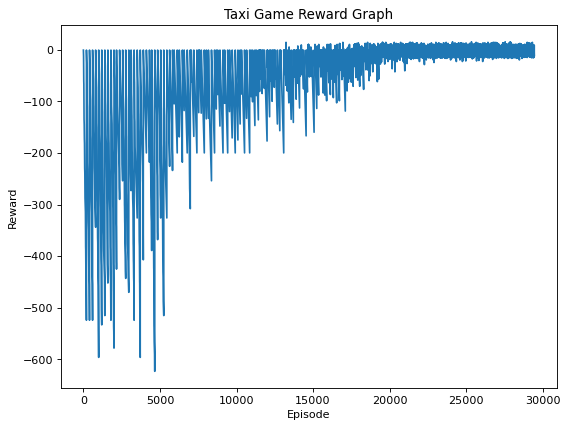

In [14]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
plt.plot(rewards)
plt.title("Taxi Game Reward Graph")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.show()

We can clearly see that it takes around 15,000 iterations to reach a non-zero reward value for our agent. Despite this not being a very complex environment, it takes a lot of episodes for our agent to have a significant performance.

In [16]:
# Let's see how the algorithm solves the taxi game by following the policy to take actions delivering max value
reward = 0
obs = env.reset()
env.render()
done = False
rewards = []
while done != True: 
    action = np.argmax(Q[obs])
    obs, rew, done, info = env.step(action) #take step using selected action
    reward = reward + rew
    env.render()
    rewards.append(reward)
#Print the reward of these actions
print("Reward: %r" % reward)  

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : :_|
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | :_: |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : |_: |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Reward: 13


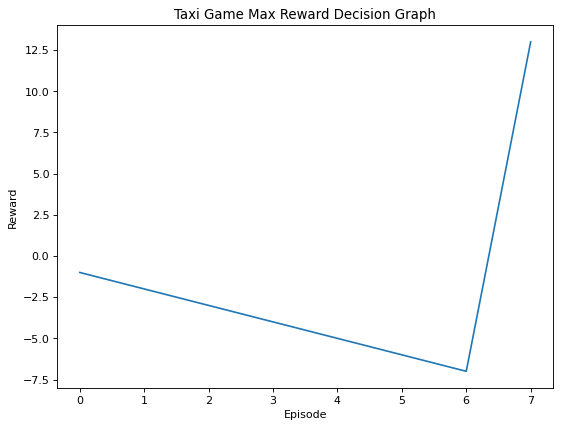

In [18]:
figure(figsize=(8, 6), dpi=80)
plt.plot(rewards)
plt.title("Taxi Game Max Reward Decision Graph")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.show()

We can clearly see that by taking the highest reward decision, our agent is able to solve the environment in a very small amount of steps. The difference between this and the previous graph is massive, in less than 10 episodes our agent was able to out-perform the previous agent in speed. One point of interest here is to see that although faster, this agent may not be as accurate in an environment where the decision making ins non-deterministic as we will see in the following. In a non-deterministic environment, where decision have to be taken considering future events, a fast agent may find itself blocked by the characteristics of the environment. 

### Frozen lakes

"Winter is here. You and your friends were tossing around a frisbee at the park when you made a wild throw that left the frisbee out in the middle of the lake. The water is mostly frozen, but there are a few holes where the ice has melted. If you step into one of those holes, you'll fall into the freezing water. At this time, there's an international frisbee shortage, so it's absolutely imperative that you navigate across the lake and retrieve the disc. However, the ice is slippery, so you won't always move in the direction you intend."

- S: Start point
- F: Frozen zone
- H: Hole
- G: Goal where the frisbee has fallen

In this case we have a non-deterministic environment in which the description defines the frozen lake as "slippery" meaning that the decisions the agent takes won't follow one single calculated path.

In [21]:
env = gym.make('FrozenLake-v0')
reward = 0
obs = env.reset()
env.render()


SFFF
FHFH
FFFH
HFFG


In [20]:
env = gym.make('FrozenLake-v0')
env.reset()

n_actions = env.action_space.n
n_states = env.observation_space.n
Q = np.zeros([n_states, n_actions]) #You could also make this dynamic if you don't know all games states upfront

gamma = 0.95 # discount factor
alpha = 0.01 # learning rate
epsilon = 0.1 #
avgrwrd = []
for episode in range(1,500001):
    done = False
    obs = env.reset()
    while done != True:
        if np.random.rand(1) < epsilon:
            # exploration with a new option with probability epsilon, the epsilon greedy approach
            action = env.action_space.sample()
        else:
            # exploitation
            action = np.argmax(Q[obs])
        obs2, rew, done, info = env.step(action) #take the action
        Q[obs,action] += alpha * (rew + gamma * np.max(Q[obs2]) - Q[obs,action]) #Update Q-matrix using Bellman equation
        obs = obs2   
        
    if episode % 5000 == 0:
        #report every 5000 steps, test 100 games to get avarage point score for statistics and verify if it is solved
        rew_average = 0.
        for i in range(100):
            obs= env.reset()
            done=False
            while done != True: 
                action = np.argmax(Q[obs])
                obs, rew, done, info = env.step(action) #take step using selected action
                rew_average += rew
        rew_average=rew_average/100
        avgrwrd.append(rew_average)
        print('Episode {} average reward: {}'.format(episode,rew_average))
        
        if rew_average > 0.8:
            # FrozenLake-v0 defines "solving" as getting average reward of 0.78 over 100 consecutive trials.
            # Test it on 0.8 so it is not a one-off lucky shot solving it
            print("Frozen lake solved")
            break

Episode 5000 average reward: 0.0
Episode 10000 average reward: 0.0
Episode 15000 average reward: 0.0
Episode 20000 average reward: 0.22
Episode 25000 average reward: 0.47
Episode 30000 average reward: 0.73
Episode 35000 average reward: 0.61
Episode 40000 average reward: 0.64
Episode 45000 average reward: 0.71
Episode 50000 average reward: 0.64
Episode 55000 average reward: 0.66
Episode 60000 average reward: 0.73
Episode 65000 average reward: 0.73
Episode 70000 average reward: 0.78
Episode 75000 average reward: 0.67
Episode 80000 average reward: 0.69
Episode 85000 average reward: 0.67
Episode 90000 average reward: 0.61
Episode 95000 average reward: 0.77
Episode 100000 average reward: 0.7
Episode 105000 average reward: 0.63
Episode 110000 average reward: 0.76
Episode 115000 average reward: 0.75
Episode 120000 average reward: 0.73
Episode 125000 average reward: 0.73
Episode 130000 average reward: 0.73
Episode 135000 average reward: 0.79
Episode 140000 average reward: 0.71
Episode 145000 a

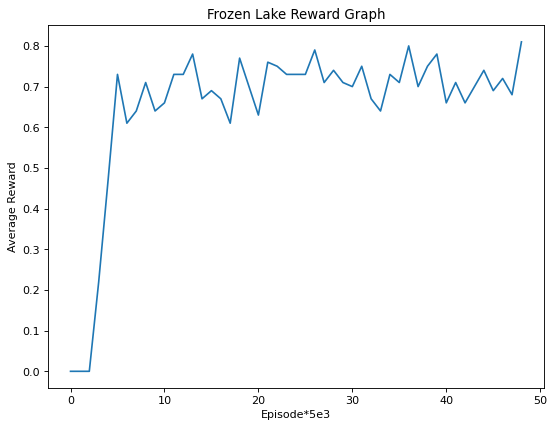

In [24]:
figure(figsize=(8, 6), dpi=80)
plt.plot(avgrwrd)
plt.title("Frozen Lake Reward Graph")
plt.xlabel("Episode*5e3")
plt.ylabel("Average Reward")
plt.show()

In [32]:
# Let's see how the algorithm solves the frozen-lakes game
env = gym.make('FrozenLake-v0')
env.reset()

reward = 0
obs = env.reset()
done = False

while done != True: 
    action = np.argmax(Q[obs])
    obs, rew, done, info = env.step(action) #take step using selected action
    reward += rew
    env.render()

print("Final reward:", reward)  

  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
Final reward: 1.0


By analizing the moves we can see that if you want to move to the rigth, there is a significant chance you move up or down. Similarly if you want to move up, there is a significant chance you move left or right. The agent has learned that if you are on the frozen tile left column second row and you want to move down it is risky to give the down command because you could move to the right into the hole, so it gives the left command because it will keep it on the tile or move up or down, but not to the right. The agent has learned to take the actions with the least risk by accidently slipping and drowning in a hole.


It is very important to notice that this Q-Learning algorithm used thousands of iterations to find the optimal policy in a game that has a 4x4 environment

## Neural Nets Applied to Reinforcement Learning

In more complex environments using a Q matrix quickly becomes unsustainable in terms of computing. As we saw in the previous examples, simple well known environments can easily be solved with traditional RL methods. When we try to implement an Rl approach to an environment that involves unknown states and actions we increment the capabilities of our system by transforming our Q-matrix into a Q-NN.

### Inverted Pendulum

In [33]:
env = gym.make('CartPole-v1')
reward = 0
obs = env.reset()
env.render()
input("Press enter to close environment...")
env.close()

Press enter to close environment...


<img src="inverted_pendulum.png">

In [34]:
print(env.action_space) # Discrete(2)
print(env.observation_space) # Box(4,)

Discrete(2)
Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)


#### Random decision agent

In [35]:
# Global variables
num_episodes = 10
max_timestep = 1000
# The main program loop
for episode in range(num_episodes):
    observation = env.reset()
    # Iterating through time steps within an episode
    for t in range(max_timestep):
        env.render()
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            # If the pole has tipped over, end this episode
            break
env.close()

#### Neural Network

In [25]:
class NNLayer:
    # class representing a neural net layer
    def __init__(self, input_size, output_size, activation=None, lr = 0.001):
        self.input_size = input_size
        self.output_size = output_size
        self.weights = np.random.uniform(low=-0.5, high=0.5, size=(input_size, output_size))
        self.stored_weights = np.copy(self.weights)
        self.activation_function = activation
        self.lr = lr
        self.m = np.zeros((input_size, output_size))
        self.v = np.zeros((input_size, output_size))
        self.beta_1 = 0.9
        self.beta_2 = 0.999
        self.time = 1
        self.adam_epsilon = 0.00000001

    # Compute the forward pass for this layer
    def forward(self, inputs, remember_for_backprop=True):
        # inputs has shape batch_size x layer_input_size 
        input_with_bias = np.append(inputs,1)
        unactivated = None
        if remember_for_backprop:
            unactivated = np.dot(input_with_bias, self.weights)
        else: 
            unactivated = np.dot(input_with_bias, self.stored_weights)
        # store variables for backward pass
        output = unactivated
        if self.activation_function != None:
            # assuming here the activation function is relu, this can be made more robust
            output = self.activation_function(output)
        if remember_for_backprop:
            self.backward_store_in = input_with_bias
            self.backward_store_out = np.copy(unactivated)
        return output    
        
    def update_weights(self, gradient):        
        m_temp = np.copy(self.m)
        v_temp = np.copy(self.v) 
        
        m_temp = self.beta_1*m_temp + (1-self.beta_1)*gradient
        v_temp = self.beta_2*v_temp + (1-self.beta_2)*(gradient*gradient)
        m_vec_hat = m_temp/(1-np.power(self.beta_1, self.time+0.1))
        v_vec_hat = v_temp/(1-np.power(self.beta_2, self.time+0.1))
        self.weights = self.weights - np.divide(self.lr*m_vec_hat, np.sqrt(v_vec_hat)+self.adam_epsilon)
        
        self.m = np.copy(m_temp)
        self.v = np.copy(v_temp)
        
    def update_stored_weights(self):
        self.stored_weights = np.copy(self.weights)
        
    def update_time(self):
        self.time = self.time+1
        
    def backward(self, gradient_from_above):
        adjusted_mul = gradient_from_above
        # this is pointwise
        if self.activation_function != None:
            adjusted_mul = np.multiply(relu_derivative(self.backward_store_out),gradient_from_above)
        D_i = np.dot(np.transpose(np.reshape(self.backward_store_in, (1, len(self.backward_store_in)))), np.reshape(adjusted_mul, (1,len(adjusted_mul))))
        delta_i = np.dot(adjusted_mul, np.transpose(self.weights))[:-1]
        self.update_weights(D_i)
        return delta_i

####  Custom Agent

In [26]:
class RLAgent:
    # class representing a reinforcement learning agent
    env = None
    def __init__(self, env, num_hidden_layers=2, hidden_size=24, gamma=0.95, epsilon_decay=0.997, epsilon_min=0.01):
        self.env = env
        self.hidden_size = hidden_size
        self.input_size = env.observation_space.shape[0]
        self.output_size = env.action_space.n
        self.num_hidden_layers = num_hidden_layers
        self.epsilon = 1.0
        self.epsilon_decay = 0.997
        self.epsilon_min = epsilon_min
        self.memory = deque([],1000000)
        self.gamma = gamma
        
        self.layers = [NNLayer(self.input_size + 1, self.hidden_size, activation=relu)]
        for i in range(self.num_hidden_layers-1):
            self.layers.append(NNLayer(self.hidden_size+1, self.hidden_size, activation=relu))
        self.layers.append(NNLayer(self.hidden_size+1, self.output_size))
        
    def select_action(self, observation):
        values = self.forward(np.asmatrix(observation))
        if (np.random.random() > self.epsilon):
            return np.argmax(values)
        else:
            return np.random.randint(self.env.action_space.n)
            
    def forward(self, observation, remember_for_backprop=True):
        vals = np.copy(observation)
        index = 0
        for layer in self.layers:
            vals = layer.forward(vals, remember_for_backprop)
            index = index + 1
        return vals
        
    def remember(self, done, action, observation, prev_obs):
        self.memory.append([done, action, observation, prev_obs])
        
    def experience_replay(self, update_size=20):
        if (len(self.memory) < update_size):
            return
        else: 
            batch_indices = np.random.choice(len(self.memory), update_size)
            for index in batch_indices:
                done, action_selected, new_obs, prev_obs = self.memory[index]
                action_values = self.forward(prev_obs, remember_for_backprop=True)
                next_action_values = self.forward(new_obs, remember_for_backprop=False)
                experimental_values = np.copy(action_values)
                if done:
                    experimental_values[action_selected] = -1
                else:
                    experimental_values[action_selected] = 1 + self.gamma*np.max(next_action_values)
                self.backward(action_values, experimental_values)
        self.epsilon = self.epsilon if self.epsilon < self.epsilon_min else self.epsilon*self.epsilon_decay
        for layer in self.layers:
            layer.update_time()
            layer.update_stored_weights()
        
    def backward(self, calculated_values, experimental_values): 
        # values are batched = batch_size x output_size
        delta = (calculated_values - experimental_values)
        # print('delta = {}'.format(delta))
        for layer in reversed(self.layers):
            delta = layer.backward(delta)

In [27]:
env = gym.make('CartPole-v1')

def relu(mat):
    return np.multiply(mat,(mat>0))
    
def relu_derivative(mat):
    return (mat>0)*1

#### InvertedPendulum training and execution

In [28]:
# Global variables
NUM_EPISODES = 1000
MAX_TIMESTEPS = 500
AVERAGE_REWARD_TO_SOLVE = 50
NUM_EPS_TO_SOLVE = 10
NUM_RUNS = 20
GAMMA = 0.95
EPSILON_DECAY = 0.997
update_size = 10
hidden_layer_size = 24
num_hidden_layers = 2
timesteps = []
model = RLAgent(env,num_hidden_layers,hidden_layer_size,GAMMA,EPSILON_DECAY)
scores_last_timesteps = deque([], NUM_EPS_TO_SOLVE)


# Main loop
for i_episode in range(NUM_EPISODES):
    observation = env.reset()
    if i_episode >= NUM_EPS_TO_SOLVE:
        if (sum(scores_last_timesteps)/NUM_EPS_TO_SOLVE > AVERAGE_REWARD_TO_SOLVE):
            print("solved after {} episodes".format(i_episode))
            break
    # Iterating through time steps within an episode
    for t in range(MAX_TIMESTEPS):
        env.render()
        action = model.select_action(observation)
        prev_obs = observation
        observation, reward, done, info = env.step(action)
        # Keep a store of the agent's experiences
        model.remember(done, action, observation, prev_obs)
        model.experience_replay(update_size)
        # epsilon decay
        if done:
            # If the pole has tipped over, end this episode
            scores_last_timesteps.append(t+1)
            timesteps.append(t+1)
            break

env.close()

solved after 48 episodes


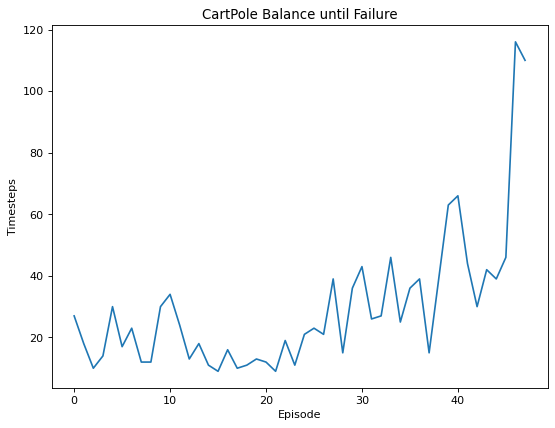

In [31]:
figure(figsize=(8, 6), dpi=80)
plt.plot(timesteps)
plt.title("CartPole Balance until Failure")
plt.xlabel("Episode")
plt.ylabel("Timesteps")
plt.show()

## ATARI Games and Mario Bros

In [54]:
# # Set-up the virtual display environment
# !apt-get update
# !apt-get install python-opengl -y
# !apt install xvfb -y
# !pip install pyvirtualdisplay
# !pip install piglet
# !apt-get install ffmpeg -y

In [55]:
from nes_py.wrappers import JoypadSpace
import gym_super_mario_bros
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

done = True
for step in range(5000):
    if done:
        state = env.reset()
    state, reward, done, info = env.step(env.action_space.sample())
    env.render()

env.close()

<img src="mario_bros.png">

Observation space: Box(0, 255, (210, 160, 3), uint8)
Action space: Discrete(4)


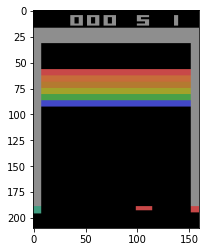

In [58]:
env = gym.make("BreakoutNoFrameskip-v4")
plt.imshow(env.render('rgb_array'))
plt.grid(False)

print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

Observation space: Box(0, 255, (210, 160, 3), uint8)
Action space: Discrete(9)


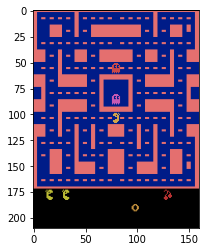

In [59]:
env = gym.make("MsPacmanNoFrameskip-v4")
plt.imshow(env.render('rgb_array'))
plt.grid(False)
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

Observation space: Box(0, 255, (210, 160, 3), uint8)
Action space: Discrete(6)


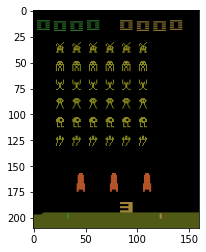

In [60]:
env = gym.make("SpaceInvadersNoFrameskip-v4")
plt.imshow(env.render('rgb_array'))
plt.grid(False)
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

## Discussion

Overall, even though we learned a lot about reinforcement learning and its intricacies, there were some limitations to our work. The Taxi, Frozen Lake and the Pendulum worked well for us after a lot of effort and research, but when we tried delving deeper into games such as Mario Bros and ATARI, we realized that the rabbit-hole only gets deeper. Reinforcement learning is an extremely vast topic. To analyze more difficult games we would have to take videos to then analyze with neural nets, and the whole process of jumping to and from different parts of the process is very complicated. Something that we would do differently in the future is to first do more research about the math and understanding behind it all, since our code describes a lot of different parts of reinforcement learning but not too profoundly. For the future, we would definitely like to continue with Mario Bros, since we find it fascinating how intricate and complex reinforcement learning can be, and all the possibilities that it brings. Furthermore, since both of us are fans of computer vision and playing around with neural network, researching and solving these problems will continue to push us and make ourselves better. 

## Resources

The domain of Reinforcement Learning has seen an increase of interest by the AI industry for its ability to solve tasks at human and even over human performance. As the CEO of DeepMind stated: Games are the perfect platform for testing, developing and finally reaching General Artificial Intelligence. In consequence the amount of resources available to learn and implement RL algorithms is bast. The current notebook is an integration of different sources both for code and the theory behind, in the next section we present the material used for the creation of this analysis project in Reinforcement Learning.


Textbooks:

- [Sutton et. al - Reinforcement Learning: An Introduction (2nd Edition)](http://incompleteideas.net/book/RLbook2018.pdf)

Libraries:

- [OpenAI Gym](https://gym.openai.com/docs/)
- [Keras RL](https://github.com/keras-rl/keras-rl)

Academic Resources:
- [Denny Britz - General Tutorial on Reinforcement Learning using Tensorflow and OpenAI Gym](https://github.com/dennybritz/reinforcement-learning)
- [DeepMind Technologies - Playing Atari with Deep Reinforcement Learning](https://arxiv.org/pdf/1312.5602v1.pdf)
- [David Silver's Course on Reinforcement Learning](https://deepmind.com/learning-resources/-introduction-reinforcement-learning-david-silver)
- [Lilain Weng - Implementing Deep Reinforcement Learning Models](https://lilianweng.github.io/lil-log/2018/05/05/implementing-deep-reinforcement-learning-models.htm)

Code Repositories:

- [OReilly Introduction to Reinforcement Learning and OpenAI Gym](https://www.oreilly.com/radar/introduction-to-reinforcement-learning-and-openai-gym/)
- [Charel Van Hoof - Learn by example Reinforcement Learning with Gym](https://www.kaggle.com/charel/learn-by-example-reinforcement-learning-with-gym)
- [Charel Van Hoof - Environment setup for Reinforcement Learning for Atari games](https://www.kaggle.com/charel/learn-by-example-reinforcement-learning-with-gym)
- [Abhav Kedia - Deep Neural Networks for Reinforcement Learning Part 1](https://towardsdatascience.com/creating-deep-neural-networks-from-scratch-an-introduction-to-reinforcement-learning-part-i-549ef7b149d2)
- [Abhav Kedia - Deep Neural Networks for Reinforcement Learning Part 3](https://towardsdatascience.com/creating-deep-neural-networks-from-scratch-an-introduction-to-reinforcement-learning-6bba874019db)
- [Abhav Kedia - Deep Neural Networks for Reinforcement Learning Part 3](https://towardsdatascience.com/creating-deep-neural-networks-from-scratch-an-introduction-to-reinforcement-learning-95bcb493a0c9)
- [Lilain Weng - Deep Reinforcement Learning with Gym](https://github.com/lilianweng/deep-reinforcement-learning-gym)